# What's in these flash-sorted files?

The flash sorting process produces binary files. The purpose of this notebook is to demonstrate how to read and display data from these files. In practice, these files are no more difficult to work with than columns of ASCII data, because modern access libraries automate the annoying and tedious parts of traversing the file's internal hierarchy.

The flash sorting analysis produces three kinds of files.
- HDF5 files with two data tables
    - the VHF sources themselves 
        - replicates ASCII data
        - retains single-point flashes
    - information about each flash
- Gridded NetCDF files
    - Counts up things that are in the HDF5 files
        - source, flash, flash initiation density
        - average flash area (area-weighted flash density)
    - The grids are [CF-compliant](http://cfconventions.org)
        - uses standardized coordinate names and metadata
        - may be automatically read in and displayed in community tools
            - [IDV](http://www.unidata.ucar.edu/software/idv/index.html)
            - [McIDAS-V](http://www.ssec.wisc.edu/mcidas/software/v/)
            - [NOAA's Weather and Climate Toolkit](http://www.ncdc.noaa.gov/wct/)
- Plots (PDF) of NetCDF grids
    - multi-panel per page, one panel for each time interval
    - very simple, with no maps, etc. 
    - useful for a quick reference


Additional data tables and gridded fields can be added to accomodate, for instance, VLF/LF stroke detection data, and an associated LMA `flash_id`.
            
    

In [1]:
%%bash

RESULTS="/data/GLM-wkshp/flashsort/results/"
ls $RESULTS
echo "-----"
ls  $RESULTS/h5_files/2009/Apr/10/
echo "-----"
ls  $RESULTS/grid_files/2009/Apr/10/
echo "-----"
cat $RESULTS/h5_files/2009/Apr/10/input_params.py

2009-04-10T18:00:00_flash_extent.png
2009-04-10T18:01:00_flash_extent.png
2009-04-10T18:02:00_flash_extent.png
2009-04-10T18:03:00_flash_extent.png
2009-04-10T18:04:00_flash_extent.png
2009-04-10T18:05:00_flash_extent.png
2009-04-10T18:06:00_flash_extent.png
2009-04-10T18:07:00_flash_extent.png
2009-04-10T18:08:00_flash_extent.png
2009-04-10T18:09:00_flash_extent.png
2009-04-10T18:10:00_flash_extent.png
2009-04-10T18:11:00_flash_extent.png
2009-04-10T18:12:00_flash_extent.png
2009-04-10T18:13:00_flash_extent.png
2009-04-10T18:14:00_flash_extent.png
2009-04-10T18:15:00_flash_extent.png
2009-04-10T18:16:00_flash_extent.png
2009-04-10T18:17:00_flash_extent.png
2009-04-10T18:18:00_flash_extent.png
2009-04-10T18:19:00_flash_extent.png
2009-04-10T18:20:00_flash_extent.png
2009-04-10T18:21:00_flash_extent.png
2009-04-10T18:22:00_flash_extent.png
2009-04-10T18:23:00_flash_extent.png
2009-04-10T18:24:00_flash_extent.png
2009-04-10T18:25:00_flash_extent.png
2009-04-10T18:26:00_flash_extent.png
2

# Inside the HDF5 files

To look inside the HDF5 file, we'll use the Python library known as PyTables.

The file object itself can be printed to describe the file's contents.

In [2]:
import os
import tables, pandas
import numpy as np

results_dir = "/data/GLM-wkshp/flashsort/results/"
h5name = os.path.join(results_dir, "h5_files/2009/Apr/10/LYLOUT_090410_180000_3600.dat.flash.h5")
h5 = tables.open_file(h5name)
print h5

/data/GLM-wkshp/flashsort/results/h5_files/2009/Apr/10/LYLOUT_090410_180000_3600.dat.flash.h5 (File) 'Flash-sorted New Mexico Tech LMA Data'
Last modif.: 'Wed Sep  2 19:59:45 2015'
Object Tree: 
/ (RootGroup) 'Flash-sorted New Mexico Tech LMA Data'
/NLDN (Group) 'NLDN strokes'
/NLDN/NLDN_090410_180000_600 (Table(0,)) 'NLDN_090410_180000_600'
/events (Group) 'Analyzed detected events'
/events/LMA_090410_180000_3600 (Table(2297208,)) 'LMA_090410_180000_3600'
/flashes (Group) 'Sorted LMA flash data'
/flashes/LMA_090410_180000_3600 (Table(139582,)) 'LMA_090410_180000_3600_cg'



The file's internal hierarchy of groups and data tables is easily navigated by tab-completion. In the next cell, type

`h5.root.`

and then tab, and you'll get a list of group and table names.

Let's look at events first. tab-complete to that group and then tab-complete again to get a reference to the data table. Note that a flash_id column has been added to the original source data.

In [3]:
h5.root.

SyntaxError: invalid syntax (<ipython-input-3-d6a4c72d774a>, line 1)

In [4]:
event_table = h5.root.events.LMA_090410_180000_3600
event_table

/events/LMA_090410_180000_3600 (Table(2297208,)) 'LMA_090410_180000_3600'
  description := {
  "alt": Float32Col(shape=(), dflt=0.0, pos=0),
  "charge": Int8Col(shape=(), dflt=0, pos=1),
  "chi2": Float32Col(shape=(), dflt=0.0, pos=2),
  "flash_id": Int32Col(shape=(), dflt=0, pos=3),
  "lat": Float32Col(shape=(), dflt=0.0, pos=4),
  "lon": Float32Col(shape=(), dflt=0.0, pos=5),
  "mask": StringCol(itemsize=4, shape=(), dflt='', pos=6),
  "power": Float32Col(shape=(), dflt=0.0, pos=7),
  "stations": UInt8Col(shape=(), dflt=0, pos=8),
  "time": Float64Col(shape=(), dflt=0.0, pos=9)}
  byteorder := 'little'
  chunkshape := (1724,)

We can get all the altitudes ...

In [5]:
event_table.cols.alt[:]

array([ 4374.60009766,  5411.29980469,  6541.10009766, ...,  5360.39990234,
        5398.89990234,  6691.20019531], dtype=float32)

Or the first ten sources ...

In [6]:
event_table[:10]

array([ (4374.60009765625, 0, 0.05999999865889549, 0, 35.799869537353516, -86.26461029052734, '015d', 14.300000190734863, 6, 64803.189990995),
       (5411.2998046875, 0, 0.07999999821186066, 0, 35.768680572509766, -86.27728271484375, '015d', 13.300000190734863, 6, 64803.036388577),
       (6541.10009765625, 0, 0.15000000596046448, 0, 35.734657287597656, -86.29420471191406, '01dd', 15.300000190734863, 7, 64803.033087856),
       (5211.89990234375, 0, 0.05000000074505806, 0, 35.77305603027344, -86.30245971679688, '015d', 15.199999809265137, 6, 64803.000147067),
       (5158.7998046875, 0, 0.10999999940395355, 0, 35.79684829711914, -86.25887298583984, '05fd', 19.100000381469727, 9, 64803.197303511),
       (3234.89990234375, 0, 0.550000011920929, 0, 35.77531051635742, -86.29548645019531, '0777', 25.600000381469727, 9, 64803.196962262),
       (4992.10009765625, 0, 0.5600000023841858, 0, 35.769142150878906, -86.29806518554688, '03dd', 15.699999809265137, 8, 64803.101830194),
       (4032.

... or the flash IDs for the first hundred sources.

In [7]:
event_table[:100]['flash_id']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's look at flash #27. The indexing operation (colon) is what actually lets us access the data, instead of just the description of the data column.

In [35]:
print event_table.cols.flash_id
query = (event_table.cols.flash_id[:] == 27)
fl_27_events = event_table[query][:]
lats, lons, alts, times = fl_27_events['lat'], fl_27_events['lon'], fl_27_events['alt'], fl_27_events['time']
for lat, lon in zip(lats, lons):
    print lat, lon

/events/LMA_090410_180000_3600.cols.flash_id (Column(2297208,), int32, idx=None)
35.1792 -87.2165
35.1794 -87.2334
35.1744 -87.2277
35.1816 -87.2336
35.1763 -87.2321
35.1795 -87.2339
35.1774 -87.2355
35.1803 -87.2326
35.1773 -87.2347
35.178 -87.2365
35.1831 -87.2346
35.1771 -87.2301
35.1834 -87.2371
35.1839 -87.2334
35.1777 -87.2299
35.1843 -87.2323
35.1703 -87.2322
35.1757 -87.2392
35.1801 -87.2437
35.1867 -87.231
35.1752 -87.2347
35.1747 -87.2325
35.1887 -87.2515
35.1809 -87.228
35.1843 -87.2236
35.1673 -87.2166
35.166 -87.2137
35.1865 -87.2299
35.1819 -87.2218
35.1841 -87.2303
35.1851 -87.2341
35.1802 -87.228
35.1812 -87.2285
35.1468 -87.2097
35.1831 -87.2244
35.1808 -87.2223
35.1801 -87.2205
35.2099 -87.1962
35.1552 -87.2193
35.2192 -87.2035
35.181 -87.2211
35.2189 -87.2046
35.2126 -87.198
35.1838 -87.2267
35.2043 -87.1903
35.2201 -87.2055
35.2146 -87.2043
35.185 -87.2235
35.195 -87.1844
35.214 -87.2072
35.186 -87.2263
35.1281 -87.2041
35.2164 -87.2109
35.2124 -87.2098
35.1945 -87.

(-87.251526, -87.156723, 35.12809, 35.224358)


(-87.251526, -87.156723, 35.12809, 35.224358)

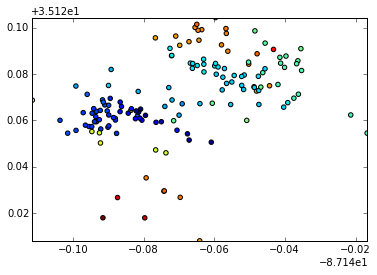

In [36]:
import matplotlib
matplotlib.rc('font', size=12)
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(lons, lats, c=times)
plt_range =  (lons.min(),lons.max(),lats.min(),lats.max())
print plt_range
plt.axis(plt_range)

Now, let's get the associated flash properties. Use pandas to make an appealing print of the the data table.

In [13]:
flash_table = h5.root.flashes.LMA_090410_180000_3600
fl_27 = flash_table[flash_table.cols.flash_id[:] == 27] # This is a numpy array with a named dtype
fl_27 = pandas.DataFrame(fl_27)

In [14]:
fl_27

,area,ctr_alt,ctr_lat,ctr_lon,duration,flash_id,init_alt,init_lat,init_lon,init_pts,n_points,start,CG
0,56.588226,5765.664062,35.190117,-87.209343,0.439238,27,6885.399902,35.184879,-87.220871,,147,64801.154587,False


In [15]:
fl_27_events = pandas.DataFrame(fl_27_events)
fl_27_events

,alt,charge,chi2,flash_id,lat,lon,mask,power,stations,time
0,5842.799805,0,0.62,27,35.179199,-87.216492,019d,7.600000,6,64801.205053
1,5592.700195,0,0.26,27,35.179440,-87.233368,07df,14.000000,10,64801.229406
2,5198.399902,0,0.59,27,35.174419,-87.227669,079c,10.900000,7,64801.229690
3,5450.500000,0,0.23,27,35.181629,-87.233559,025d,9.700000,6,64801.230050
4,4926.000000,0,0.45,27,35.176300,-87.232147,07cd,11.300000,8,64801.230588
5,5968.399902,0,0.61,27,35.179451,-87.233910,05f7,14.600000,9,64801.230748
6,6123.600098,0,0.22,27,35.177376,-87.235466,03c9,11.000000,6,64801.230961
7,5068.399902,0,0.23,27,35.180313,-87.232552,07dd,12.700000,9,64801.231316
8,4943.500000,0,0.73,27,35.177345,-87.234688,07dd,16.600000,9,64801.231521
9,5369.600098,0,0.48,27,35.177967,-87.236488,079d,13.600000,8,64801.231750


More [sophisticated queries](http://www.pytables.org/usersguide/condition_syntax.html) with the HDF5 data (and pandas) are possible.

#Inside the NetCDF files

In [16]:
import netCDF4 as ncdf

In [17]:
nc_name = os.path.join(results_dir, "grid_files/2009/Apr/10/NALMA_20090410_180000_3600_10src_0.0109deg-dx_flash_extent.nc")
nc = ncdf.Dataset(nc_name)
print nc
print nc.variables['crs']

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    dimensions(sizes): lon(400), lat(400), ntimes(60)
    variables(dimensions): int32 crs(), float32 time(ntimes), float32 longitude(lon), float32 latitude(lat), int32 flash_extent(ntimes,lon,lat)
    groups: 

<type 'netCDF4._netCDF4.Variable'>
int32 crs()
    semi_major_axis: 6.37814e+06
    longitude_of_prime_meridian: 0.0
    grid_mapping_name: latitude_longitude
    inverse_flattening: 298.257
unlimited dimensions: 
current shape = ()
filling off



In [20]:
from lmatools.multiples_nc import centers_to_edges
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
lon, lat, fl_dens = nc.variables['longitude'][:], nc.variables['latitude'][:], nc.variables['flash_extent'][:]
lon_edge, lat_edge = centers_to_edges(lon), centers_to_edges(lat)

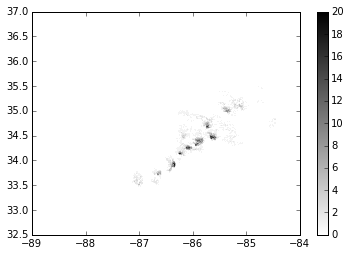

In [21]:
time_index = 0
plt.pcolormesh(lon_edge, lat_edge, fl_dens[time_index,:,:], cmap='gray_r')
cbar = plt.colorbar()

## Saving a custom animation

The `lmatools` package includes a way to access these grids as a collection. We will use the collection to make a series of frames for an animation. This example is adapted from a notebook included in `lmatools`.

In [27]:
import glob
from lmatools.grid_collection import LMAgridFileCollection

nc_filenames=glob.glob(os.path.join(results_dir, "grid_files/2009/Apr/10/*1[89]00*_flash_extent.nc"))
print nc_filenames
nc_field = 'flash_extent'
NCs = LMAgridFileCollection(nc_filenames, nc_field, x_name='longitude', y_name='latitude')

['/data/GLM-wkshp/flashsort/results/grid_files/2009/Apr/10/NALMA_20090410_180000_3600_10src_0.0109deg-dx_flash_extent.nc', '/data/GLM-wkshp/flashsort/results/grid_files/2009/Apr/10/NALMA_20090410_190000_3600_10src_0.0109deg-dx_flash_extent.nc']


In [28]:
from datetime import datetime
t  = datetime(2009,4,10,18,30,00)
xedge, yedge, data = NCs.data_for_time(t)
limits = xedge.min(), xedge.max(), yedge.min(), yedge.max()

In [29]:
fig = plt.figure(figsize=(12,12))
if False: # set this to True to actually write files.
    for t, lon, lat, data in NCs:
        ax = plt.subplot(111)
        mesh = ax.pcolormesh(lon, lat, np.log10(data), vmin=0, vmax=3, cmap='gray_r')
        ax.axis(limits)
        plt.colorbar(mesh)
        outfile = "{0}_{1}.png".format(t.isoformat(), nc_field)
        save_path = os.path.join(results_dir, outfile)
        print(save_path)
        fig.savefig(save_path)
        fig.clf()

## Interactive animation

Even better, we can use the notebook's widget system to make an interactive version of the above.

In [30]:
from IPython.html.widgets import interactive
from IPython.display import display

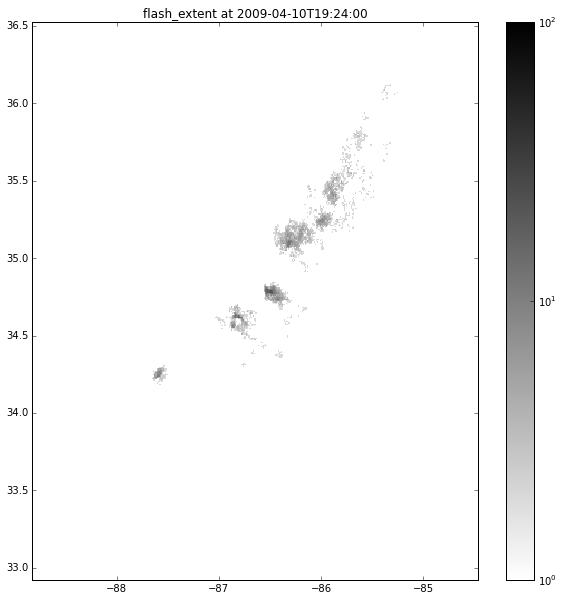

In [32]:
from matplotlib.colors import LogNorm

def plot_for_frame(frame=0):
    # get the data
    t = NCs.times[frame]
    xedge, yedge, data = NCs.data_for_time(t)
    
    # plot a frame of data
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    mesh = ax.pcolormesh(xedge, yedge, data, 
                         vmin=1, vmax=100, norm=LogNorm(), cmap='gray_r')
    ax.axis(limits)
    plt.colorbar(mesh, ax=ax)
    title = "{1} at {0}".format(t.isoformat(), nc_field)
    ax.set_title(title)
    return fig
    
N_frames = len(NCs.times)
w = interactive(plot_for_frame, frame=(0, N_frames-1))
display(w)